<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/ForcatingModel_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/airline_passengers.csv", index_col="Month", parse_dates=True)
data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [4]:
data.index.freq = 'MS'
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [5]:
data.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


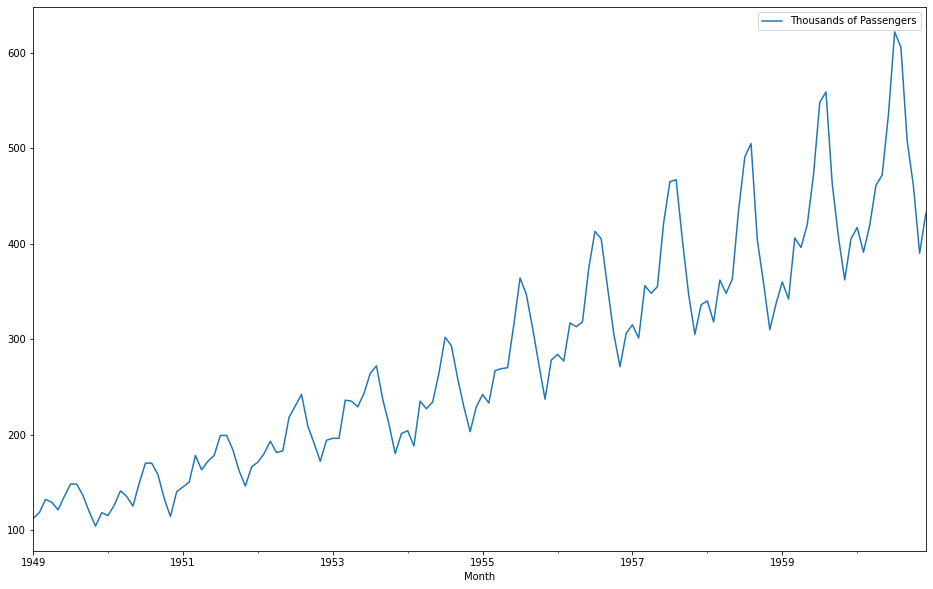

In [6]:
data.plot(figsize=(16,10))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 7.2 KB


In [8]:
train_data = data.iloc[:109]
test_data = data.iloc[108:]

In [9]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [13]:
test_prediction = fitted_model.forecast(36) # 12 month year we using 3 yaer
test_prediction.head()

1958-02-01    339.140408
1958-03-01    399.277401
1958-04-01    394.227360
1958-05-01    402.541372
1958-06-01    473.133165
Freq: MS, dtype: float64

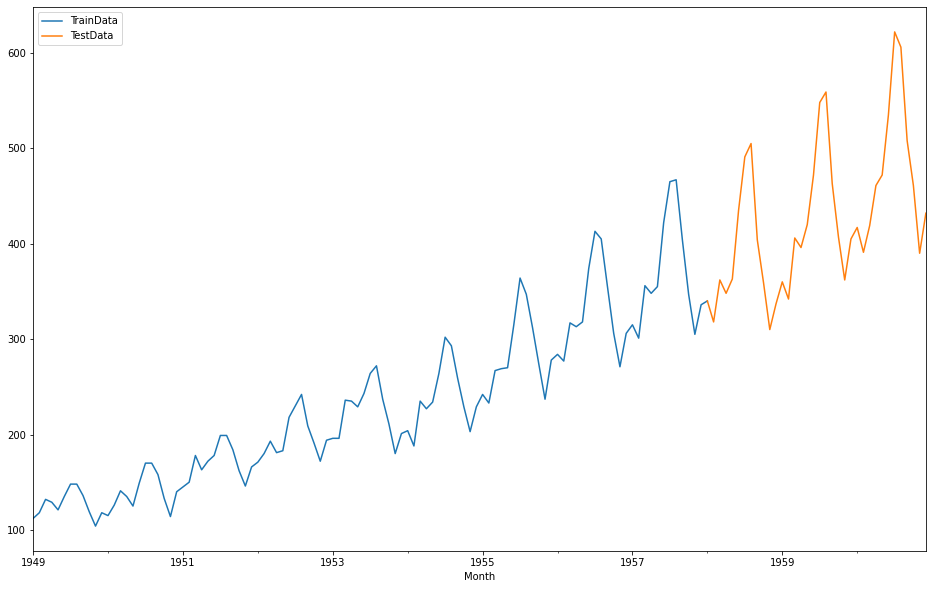

In [17]:
train_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TrainData')
test_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TestData')

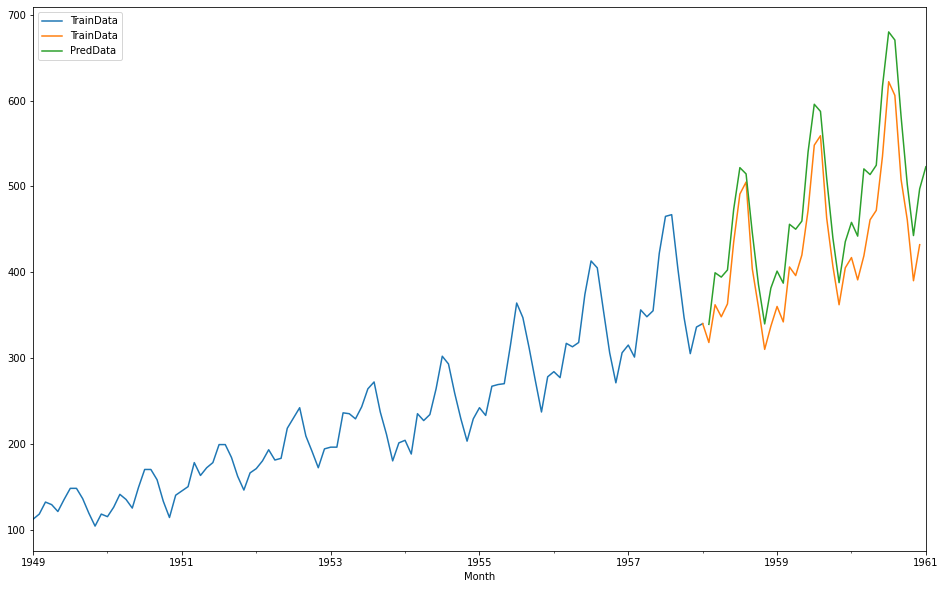

In [18]:
train_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TrainData')
test_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TrainData')
test_prediction.plot(figsize=(16,10), legend=True, label='PredData')

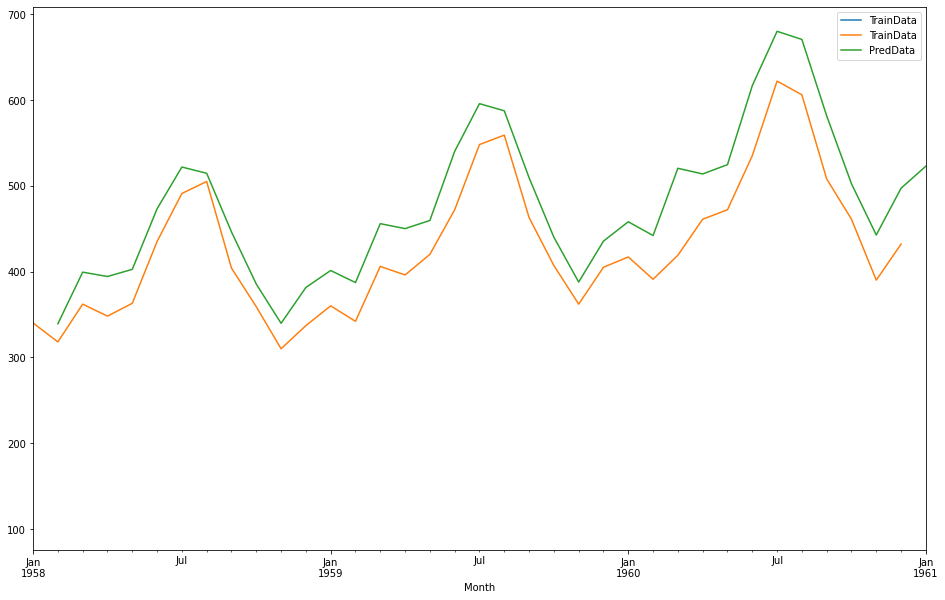

In [19]:
train_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TrainData')
test_data['Thousands of Passengers'].plot(figsize=(16,10), legend=True, label='TrainData')
test_prediction.plot(figsize=(16,10), legend=True, label='PredData', xlim=['1958-01-01', '1961-01-01'])

**Evaluation of Model**